# Lab 2: Titanic Dataset Analysis
**Author:** Kate Huntsman
**Date:** March 15th, 2025  
**Objective:** Analyze the Titanic dataset and predict survival by exploring the data, handling missing values, performing feature engineering, and preparing it for machine learning models.


## Introduction:
In this notebook, we will analyze the Titanic dataset to predict survival. We will inspect, explore, clean, and prepare the data for machine learning models. This process includes handling missing values, feature engineering, and performing data visualizations.

## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [4]:
# all imports get moved to the top - import each only once
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

## Section 1: Import and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows

In [5]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

In [6]:
# Display basic info
titanic.info()

# Display the first 10 rows
print(titanic.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0 

### 1.2 Check for missing values and display summary statistics

In [7]:
# Check for missing values using the isnull() method and then the sum() method. 
titanic.isnull().sum()

# Display summary statistics using the describe() method
print(titanic.describe())

# Check for correlations using the corr() method and tell it to use only the numeric features. 
print(titanic.corr(numeric_only=True))

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
si

Reflection 1:
1) How many data instances are there? 891

2) How many features are there? 12

3) What are the names? 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive', 'alone'.

4) Are there any missing values? Yes, there are missing values in the columns 'age', 'embarked', 'deck', and 'embark_town'.

5) Are there any non-numeric features? Yes, the non-numeric features include 'sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive', and 'alone'.

6) Are the data instances sorted on any of the attributes? No, the data instances are not sorted by any attribute.

7) What are the units of age? Years

8) What are the minimum, median and max age? Minimum:0.42 years, Median: 28 years, Maximum: 80 years

9) What two different features have the highest correlation? 'sibsp' and 'parch' (family-related features) have a high correlation, as expected since they both relate to the number of family members aboard.

10) Are there any categorical features that might be useful for prediction? Yes, features like 'sex', 'pclass', 'embarked', and 'class' might be useful for predicting survival as they are related to the social class and demographic characteristics of passengers.

## Section 2: Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions

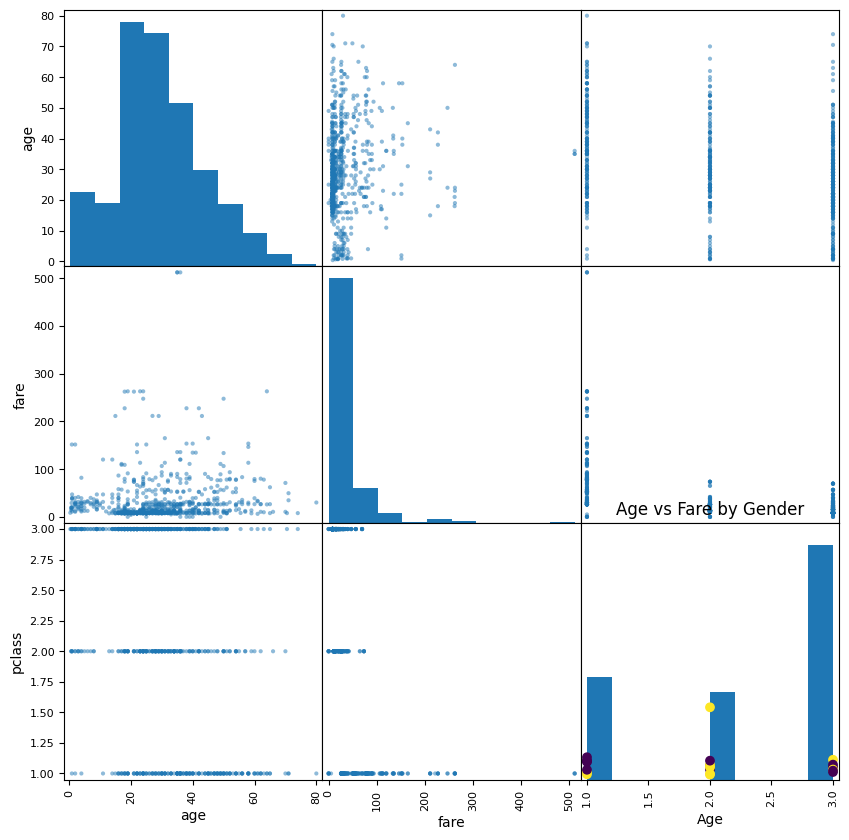

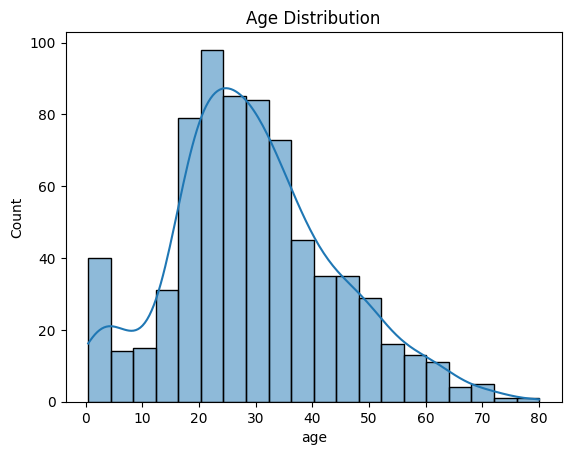

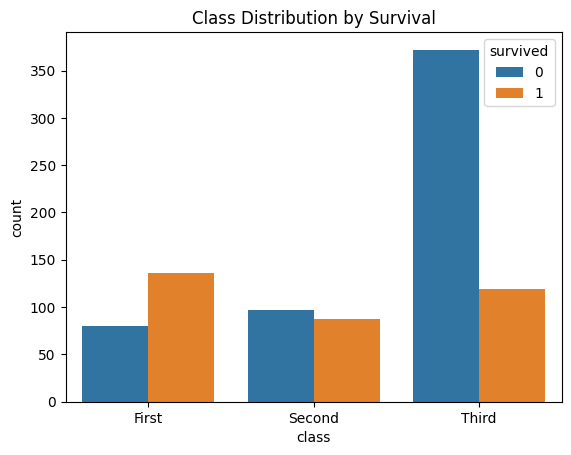

In [8]:
# Create a scatter matrix
attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))

# Create a scatter plot of age vs fare, colored by gender
plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

# Create a histogram of age
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Create a count plot for class and survival
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

Reflection 2.1:

1) What patterns or anomalies do you notice? There is an imbalance in the survival rates, with more passengers having not survived than survived. Additionally, there is a pattern of higher survival rates for first-class passengers, females, and younger passengers.

2) Do any features stand out as potential predictors? Yes, features like 'sex', 'pclass', and 'age' stand out as potential predictors of survival, as females, first-class passengers, and younger individuals had higher survival rates.

3) Are there any visible class imbalances? Yes, there is a class imbalance in the survival variable. More passengers did not survive compared to those who survived.

### 2.2 Handle Missing Values and Clean Data

In [9]:
# Impute missing age values with the median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Impute missing embark_town values with the mode
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

/var/folders/lr/4whsggrn38sckt88gcfvgqmr0000gn/T/ipykernel_36866/479254532.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
/var/folders/lr/4whsggrn38sckt88gcfvgqmr0000gn/T/ipykernel_36866/479254532.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

### 2.3 Feature Engineering

In [10]:
# Create a new feature: Family size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Convert categorical data to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Create a binary feature for 'alone'
titanic['alone'] = titanic['alone'].astype(int)

Reflection 2.3:

1) Why might family size be a useful feature for predicting survival? Family size might be useful because passengers traveling with family members may have had a higher chance of survival, especially if they stayed together during evacuation. Larger families might indicate higher social cohesion or joint survival strategies.

2) Why convert categorical data to numeric? Categorical data must be converted to numeric for machine learning models because most algorithms work with numerical inputs. Mapping categories like 'sex' and 'embarked' to numbers allows the models to learn from them.

## Section 3: Feature Selection and Justification

### 3.1 Choose Features and Target

In [11]:
# Select features and target
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

Reflection 3:

1) Why are these features selected? The selected features ('age', 'fare', 'pclass', 'sex', 'family_size') are chosen because they contain both demographic and social information that could influence survival. For example, 'sex' has a strong correlation with survival, and 'pclass' represents social class, which was an important factor during the Titanic disaster.

2) Are there any features that are likely to be highly predictive of survival? Yes, features like 'sex', 'pclass', and 'family_size' are likely to be highly predictive of survival. Females and first-class passengers had higher survival rates, and family size could be linked to survival patterns.

## Section 4: Splitting Data

### 4.1 Basic Train/Test Split

In [12]:
# Train/Test Split
train_set, test_set = train_test_split(X, y, test_size=0.2, random_state=123)

print('Train size:', len(train_set))
print('Test size:', len(test_set))

ValueError: too many values to unpack (expected 2)

### 4.2 Stratified Train/Test Split

In [ ]:
# Stratified Train/Test Split
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

### 4.3 Compare Results

In [ ]:
# Compare original, train, and test class distributions
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))

Reflection 4:

1) Why might stratification improve model performance? Stratification ensures that the train and test sets maintain the same distribution of the target variable as the original dataset. This helps in better model training and avoids overfitting or underfitting due to unbalanced class distributions.

2) How close are the training and test distributions to the original dataset? The stratified split method keeps the class distribution (survived vs. not survived) similar in both the training and test datasets compared to the original dataset. The basic split might not maintain this balance as well.

3) Which split method produced better class balance? The stratified split method produced better class balance in the training and test sets compared to the basic train/test split method.